### Разработка модели предсказания потери почтовых отправлений

Библиотеки

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
from IPython.core.pylabtools import figsize
pd.set_option('display.max_column',30)

In [2]:
df = pd.read_csv('train_dataset_train.csv',low_memory=False)

In [3]:
df

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,directctg,transport_pay,postmark,name_mfi,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,1043_-1,628629,Участок,7503.0,N,0.0,Y,N,87.0,5.0,1.0,0.0,2.0,0.00,0.0,"Fishhook,USB",41.0,150.0,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,1023_-1,102976,ММПО,7503.0,N,0.0,N,N,107.0,5.0,1.0,0.0,2.0,0.00,0.0,"screen protector,Case(Q613B),case(208B40-DB)",68.0,400.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,1018_-1,620962,Цех,7503.0,N,0.0,Y,N,50.0,5.0,1.0,0.0,2.0,0.00,0.0,"Pendant Necklaces,Rings for Women,Necklaces",56.0,218.0,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0
3,9020937,1019_-1,344964,Цех,7503.0,N,0.0,Y,N,416.0,5.0,1.0,0.0,2.0,35.34,0.0,Motorcycle Signal Lamp,33.0,100.0,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0
4,3082311,1020_-1,629819,Участок,7503.0,N,0.0,Y,N,795.0,5.0,1.0,0.0,2.0,52.52,0.0,backpack,716.0,1000.0,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,9958614,1022_-1,102976,ММПО,7503.0,N,0.0,N,N,25.0,5.0,0.0,0.0,2.0,0.00,0.0,KEY CHAIN,24.0,100.0,1089.0,64270133.0,116432632.0,180702765.0,188407812.0,0,0,1,0,0
5999996,2234489,1022_-1,241963,Цех,7503.0,N,0.0,Y,N,83.0,5.0,1.0,0.0,2.0,0.00,0.0,Dolls,100.0,1832.0,31.0,1767370.0,144063.0,1911433.0,15582018.0,0,0,0,0,0
5999997,4304572,1041_-1,102971,Цех,7506.0,N,0.0,N,N,1700.0,5.0,1.0,0.0,2.0,94.09,0.0,Down jacket,952.0,800.0,186.0,60613352.0,10648.0,60624000.0,75592387.0,0,0,0,0,0
5999998,6550634,1018_-1,102152,Цех,7506.0,N,0.0,N,N,269.0,5.0,1.0,0.0,2.0,0.00,0.0,0,0.0,0.0,105.0,15091338.0,4972424.0,20063762.0,39988530.0,0,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   id                             int64  
 1   oper_type + oper_attr          object 
 2   index_oper                     object 
 3   type                           object 
 4   priority                       float64
 5   is_privatecategory             object 
 6   class                          float64
 7   is_in_yandex                   object 
 8   is_return                      object 
 9   weight                         float64
 10  mailtype                       float64
 11  mailctg                        float64
 12  mailrank                       float64
 13  directctg                      float64
 14  transport_pay                  float64
 15  postmark                       float64
 16  name_mfi                       object 
 17  weight_mfi                     float64
 18  pr

- 16 столбцов типа float64
- 6 столбцов тип int64
- 7 столбцов типа object

In [5]:
df.columns

Index(['id', 'oper_type + oper_attr', 'index_oper', 'type', 'priority',
       'is_privatecategory', 'class', 'is_in_yandex', 'is_return', 'weight',
       'mailtype', 'mailctg', 'mailrank', 'directctg', 'transport_pay',
       'postmark', 'name_mfi', 'weight_mfi', 'price_mfi',
       'dist_qty_oper_login_1', 'total_qty_oper_login_1',
       'total_qty_oper_login_0', 'total_qty_over_index_and_type',
       'total_qty_over_index', 'is_wrong_sndr_name', 'is_wrong_rcpn_name',
       'is_wrong_phone_number', 'is_wrong_address', 'label'],
      dtype='object')

Расшифровка полей
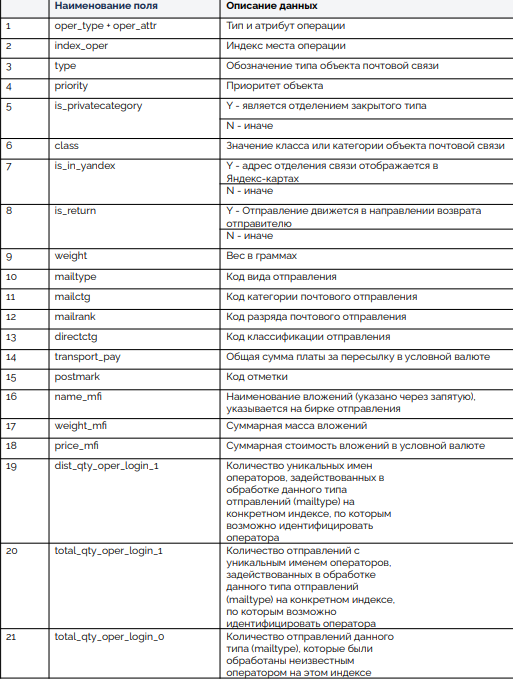
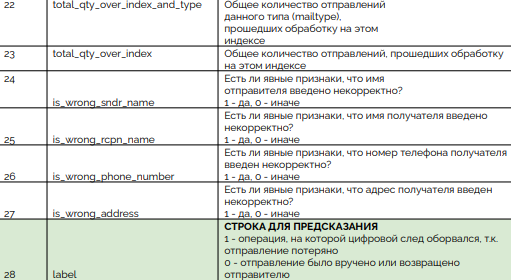

In [6]:
print(df.isna().sum()/len(df)*100)

id                               0.0
oper_type + oper_attr            0.0
index_oper                       0.0
type                             0.0
priority                         0.0
is_privatecategory               0.0
class                            0.0
is_in_yandex                     0.0
is_return                        0.0
weight                           0.0
mailtype                         0.0
mailctg                          0.0
mailrank                         0.0
directctg                        0.0
transport_pay                    0.0
postmark                         0.0
name_mfi                         0.0
weight_mfi                       0.0
price_mfi                        0.0
dist_qty_oper_login_1            0.0
total_qty_oper_login_1           0.0
total_qty_oper_login_0           0.0
total_qty_over_index_and_type    0.0
total_qty_over_index             0.0
is_wrong_sndr_name               0.0
is_wrong_rcpn_name               0.0
is_wrong_phone_number            0.0
i

Пропусков нет 

#### Посмотрим столбы типа object

###### Столбец oper_type + oper_attr ( Тип и артибут операции )

In [7]:
df['oper_type + oper_attr'].unique()

array(['1043_-1', '1023_-1', '1018_-1', '1019_-1', '1020_-1', '1001_-1',
       '8_13', '1_-1', '1022_-1', '8_0', '8_3', '1041_-1', '1016_-1',
       '11_-1', '8_2', '8_6', '183_-1', '1042_-1', '9_-1', '1004_-1',
       '14_1', '1014_-1', '26_-1', '1044_-1', '29_-1', '0_-1', '184_-1',
       '185_-1', '39_-1', '2_1', '131_-1', '12_9', '41_-1', '2_6',
       '14_10', '12_1', '1026_-1', '1015_-1', '154_-1', '1025_-1',
       '1017_-1', '1012_-1', '8_5', '12_8', '8_4', '8_20', '1021_-1',
       '4_3', '14_1001', '14_18', '1027_-1', '6_3', '1017_1001', '114_-1',
       '1045_-1', '3_1', '14_21', '1017_1000', '30_-1', '1005_-1', '4_1',
       '184_1', '14_20', '8_182', '2_8', '11_0', '104_-1', '183_1',
       '41_4', '12_11', '20_-1', '15_-1', '41_1', '14_16', '12_2',
       '1013_-1', '12_10', '1002_-1', '3_9', '8_1', '12_4', '1003_-1',
       '2_10', '6_1', '4_2', '14_6', '14_17', '8_22', '2_11', '10_-1',
       '8_18', '41_3', '12_6', '3_10', '34_-1', '2_2', '6_5', '5_3',
       '24_-1',

In [8]:
df['oper_type + oper_attr'].value_counts()

1020_-1    693154
1022_-1    656597
1019_-1    413710
8_0        402877
1_-1       359402
            ...  
5_3             1
1009_-1         1
2_10            1
128_-1          1
34_-1           1
Name: oper_type + oper_attr, Length: 109, dtype: int64

Закодируем этот столбец с помощью LabelEncoder

In [9]:
df['oper_type + oper_attr'] = lb.fit_transform(df['oper_type + oper_attr'])

In [10]:
df['oper_type + oper_attr'].unique()

array([ 26,  20,  15,  16,  17,   1,  95,  64,  19,  93, 103,  24,  11,
        32,  99, 107,  58,  25, 108,   4,  45,   9,  67,  27,  68,   0,
        60,  62,  77,  69,  44,  43,  81,  73,  46,  35,  22,  10,  56,
        21,  12,   7, 105,  42, 104, 100,  18,  87,  47,  51,  23,  91,
        14,  31,  28,  78,  54,  13,  75,   5,  85,  61,  53,  98,  74,
        33,  29,  59,  84,  37,  65,  57,  82,  49,  38,   8,  36,   2,
        80,  94,  39,   3,  70,  90,  86,  55,  50, 102,  71,  30,  97,
        83,  40,  79,  76,  72,  92,  89,  66,  88,  96, 101, 106,  52,
        34,  41,  63,  48,   6])

##### столбец index_oper ( Индекс места операции )

In [11]:
df.index_oper.unique()

array(['628629', '102976', '620962', ..., '164559', '452593', '422418'],
      dtype=object)

In [12]:
df.index_oper.value_counts()

102976    1591425
102971     809023
620984     136389
102998     107961
102968      98751
           ...   
692085          1
393610          1
354389          1
181623          1
445556          1
Name: index_oper, Length: 22159, dtype: int64

Закодируем с помощью LabelEncoder

In [13]:
df.index_oper = lb.fit_transform(df.index_oper)

In [14]:
df.index_oper.unique()

array([17235,    23, 16331, ...,  2419, 13724, 11539])

###### Столбец type ( Обозначение типа объекта почтовой связи )

In [15]:
df.type.unique()

array(['Участок', 'ММПО', 'Цех', 'П', 'ТИ', 'ГОПС', 'МСЦ', 'СОПС', 'АО',
       'МРП', 'СЦ', 'МСО', 'ОПП', 'АОПП', 'ПЕРЕДВИЖНОЕ ОС', 'ОП', '0',
       'ППС', 'УМСЦ', 'УКД'], dtype=object)

In [16]:
df.type.value_counts()

Цех               2093668
ММПО              1614974
Участок            926631
ГОПС               463750
ТИ                 305490
П                  245814
МСЦ                223241
СОПС                72161
СЦ                  12469
ОП                   9527
МСО                  7465
ОПП                  7190
АОПП                 6682
МРП                  3850
0                    3444
АО                   1304
ПЕРЕДВИЖНОЕ ОС       1006
ППС                   682
УМСЦ                  569
УКД                    83
Name: type, dtype: int64

Закодируем с помощью LabelEncoder

In [17]:
df.type = lb.fit_transform(df.type)

In [18]:
df.type.unique()

array([18,  4, 19, 10, 15,  3,  7, 13,  1,  5, 14,  6,  9,  2, 11,  8,  0,
       12, 17, 16])

#### Столбец is_privatecategory ( Y - является отделением закрытого типа N - иначе )

In [19]:
df.is_privatecategory.unique()

array(['N', 'Y', '0'], dtype=object)

In [20]:
df.is_privatecategory.value_counts()

N    5994524
Y       2806
0       2670
Name: is_privatecategory, dtype: int64

Закодируем с помощью словаря 

In [21]:
dictIs_privatecategory = {'0':0,'Y':2,'N':1}
df.is_privatecategory = df.is_privatecategory.map(dictIs_privatecategory)

In [22]:
df.is_privatecategory.unique()

array([1, 2, 0], dtype=int64)

##### Столбец is_in_yandex ( Y - адрес отделения связи отображается в Яндекс-картах N - иначе )

In [23]:
df.is_in_yandex.unique()

array(['Y', 'N', '0'], dtype=object)

In [24]:
df.is_in_yandex.value_counts()

N    3585956
Y    2411374
0       2670
Name: is_in_yandex, dtype: int64

Кодировать будем с помощью словаря выше

In [25]:
df.is_in_yandex = df.is_in_yandex.map(dictIs_privatecategory)

In [26]:
df.is_in_yandex.unique()

array([2, 1, 0], dtype=int64)

###### Столбец is_return ( Y - Отправление движется в направлении возврата отправителю N - иначе )

In [27]:
df.is_return.unique()

array(['N', 'Y'], dtype=object)

In [28]:
df.is_return.value_counts()

N    5993017
Y       6983
Name: is_return, dtype: int64

Закодируем словарем 

In [29]:
dictIs_return = {'N':0,'Y':1}
df.is_return = df.is_return.map(dictIs_return)

##### Столбец name_mfi ( Наименование вложений (указано через запятую), указывается на бирке отправления ) 

In [30]:
df.name_mfi.unique()

array(['Fishhook,USB', 'screen protector,Case(Q613B),case(208B40-DB)',
       'Pendant Necklaces,Rings for Women,Necklaces', ...,
       'shower head(4001139432488)', 'earrings(4000489893750)',
       'Piston Rings PR-PW60-2SET(PR-PW60-2SET),Piston Rings PR-PW60-2SET(PR-PW6'],
      dtype=object)

In [31]:
df.name_mfi.value_counts()

0                                                                                          815434
Mobile Phone Bags & Cases                                                                   48165
Screen Protectors                                                                           45032
phone case                                                                                  42696
Phone Case                                                                                  25031
                                                                                            ...  
g    tube connector                                                                             1
Air compressor safety valve(4001213037775),Check Valve,Air compressor safety valve(4001         1
Phone case(A0012-Xiaomi-10T-Pro-,Phone case(A0012-Xiaomi-10T-Pro-DarkGreen)                     1
Consumer electronics,Headphone sleeve,Ear pads                                                  1
Hand Rests          

Закодируем с помощью LabelEncoder

In [32]:
df.name_mfi = lb.fit_transform(df.name_mfi)

In [33]:
df.name_mfi.unique()

array([ 46654, 194484,  92224, ..., 197206, 159013,  98102])

In [34]:
df.name_mfi.value_counts()

101       815434
74551      48165
108790     45032
183628     42696
93381      25031
           ...  
204612         1
202307         1
3307           1
41588          1
28219          1
Name: name_mfi, Length: 212936, dtype: int64

#### Посмотрим данные подробней

In [35]:
df

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,directctg,transport_pay,postmark,name_mfi,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,26,17235,18,7503.0,1,0.0,2,0,87.0,5.0,1.0,0.0,2.0,0.00,0.0,46654,41.0,150.0,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,20,23,4,7503.0,1,0.0,1,0,107.0,5.0,1.0,0.0,2.0,0.00,0.0,194484,68.0,400.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,15,16331,19,7503.0,1,0.0,2,0,50.0,5.0,1.0,0.0,2.0,0.00,0.0,92224,56.0,218.0,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0
3,9020937,16,6325,19,7503.0,1,0.0,2,0,416.0,5.0,1.0,0.0,2.0,35.34,0.0,79671,33.0,100.0,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0
4,3082311,17,17315,18,7503.0,1,0.0,2,0,795.0,5.0,1.0,0.0,2.0,52.52,0.0,141303,716.0,1000.0,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,9958614,19,23,4,7503.0,1,0.0,1,0,25.0,5.0,0.0,0.0,2.0,0.00,0.0,63431,24.0,100.0,1089.0,64270133.0,116432632.0,180702765.0,188407812.0,0,0,1,0,0
5999996,2234489,19,4697,19,7503.0,1,0.0,2,0,83.0,5.0,1.0,0.0,2.0,0.00,0.0,36730,100.0,1832.0,31.0,1767370.0,144063.0,1911433.0,15582018.0,0,0,0,0,0
5999997,4304572,24,18,19,7506.0,1,0.0,1,0,1700.0,5.0,1.0,0.0,2.0,94.09,0.0,37295,952.0,800.0,186.0,60613352.0,10648.0,60624000.0,75592387.0,0,0,0,0,0
5999998,6550634,15,6,19,7506.0,1,0.0,1,0,269.0,5.0,1.0,0.0,2.0,0.00,0.0,101,0.0,0.0,105.0,15091338.0,4972424.0,20063762.0,39988530.0,0,1,0,0,0


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,6000000.0,4.999167e+06,2.886491e+06,1.0,2500126.25,4999347.5,7.498348e+06,9999999.0
oper_type + oper_attr,6000000.0,3.613161e+01,3.247675e+01,0.0,16.00,19.0,6.400000e+01,108.0
index_oper,6000000.0,4.909762e+03,6.986511e+03,0.0,23.00,27.0,1.025100e+04,22158.0
type,6000000.0,1.237932e+01,6.921657e+00,0.0,4.00,18.0,1.900000e+01,19.0
priority,6000000.0,7.499824e+03,1.751917e+02,0.0,7503.00,7503.0,7.506000e+03,7506.0
is_privatecategory,6000000.0,1.000023e+00,3.021037e-02,0.0,1.00,1.0,1.000000e+00,2.0
class,6000000.0,3.571923e-01,9.861573e-01,0.0,0.00,0.0,0.000000e+00,5.0
is_in_yandex,6000000.0,1.401451e+00,4.910988e-01,0.0,1.00,1.0,2.000000e+00,2.0
is_return,6000000.0,1.163833e-03,3.409515e-02,0.0,0.00,0.0,0.000000e+00,1.0
weight,6000000.0,2.399936e+02,4.504002e+02,0.0,52.00,105.0,2.640000e+02,158000.0


Посмотрим столбец mailrank

In [37]:
df.mailrank.unique()

array([0.])

Код разряда почтового отправления

Скорей всего это бесплолезный столбец
- Удалим его 

In [38]:
df = df.drop('mailrank',axis=1)

In [39]:
df

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,directctg,transport_pay,postmark,name_mfi,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,26,17235,18,7503.0,1,0.0,2,0,87.0,5.0,1.0,2.0,0.00,0.0,46654,41.0,150.0,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,20,23,4,7503.0,1,0.0,1,0,107.0,5.0,1.0,2.0,0.00,0.0,194484,68.0,400.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,15,16331,19,7503.0,1,0.0,2,0,50.0,5.0,1.0,2.0,0.00,0.0,92224,56.0,218.0,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0
3,9020937,16,6325,19,7503.0,1,0.0,2,0,416.0,5.0,1.0,2.0,35.34,0.0,79671,33.0,100.0,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0
4,3082311,17,17315,18,7503.0,1,0.0,2,0,795.0,5.0,1.0,2.0,52.52,0.0,141303,716.0,1000.0,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,9958614,19,23,4,7503.0,1,0.0,1,0,25.0,5.0,0.0,2.0,0.00,0.0,63431,24.0,100.0,1089.0,64270133.0,116432632.0,180702765.0,188407812.0,0,0,1,0,0
5999996,2234489,19,4697,19,7503.0,1,0.0,2,0,83.0,5.0,1.0,2.0,0.00,0.0,36730,100.0,1832.0,31.0,1767370.0,144063.0,1911433.0,15582018.0,0,0,0,0,0
5999997,4304572,24,18,19,7506.0,1,0.0,1,0,1700.0,5.0,1.0,2.0,94.09,0.0,37295,952.0,800.0,186.0,60613352.0,10648.0,60624000.0,75592387.0,0,0,0,0,0
5999998,6550634,15,6,19,7506.0,1,0.0,1,0,269.0,5.0,1.0,2.0,0.00,0.0,101,0.0,0.0,105.0,15091338.0,4972424.0,20063762.0,39988530.0,0,1,0,0,0


#### Построим графики по сету и определим что влияет на нашу целевую переменную

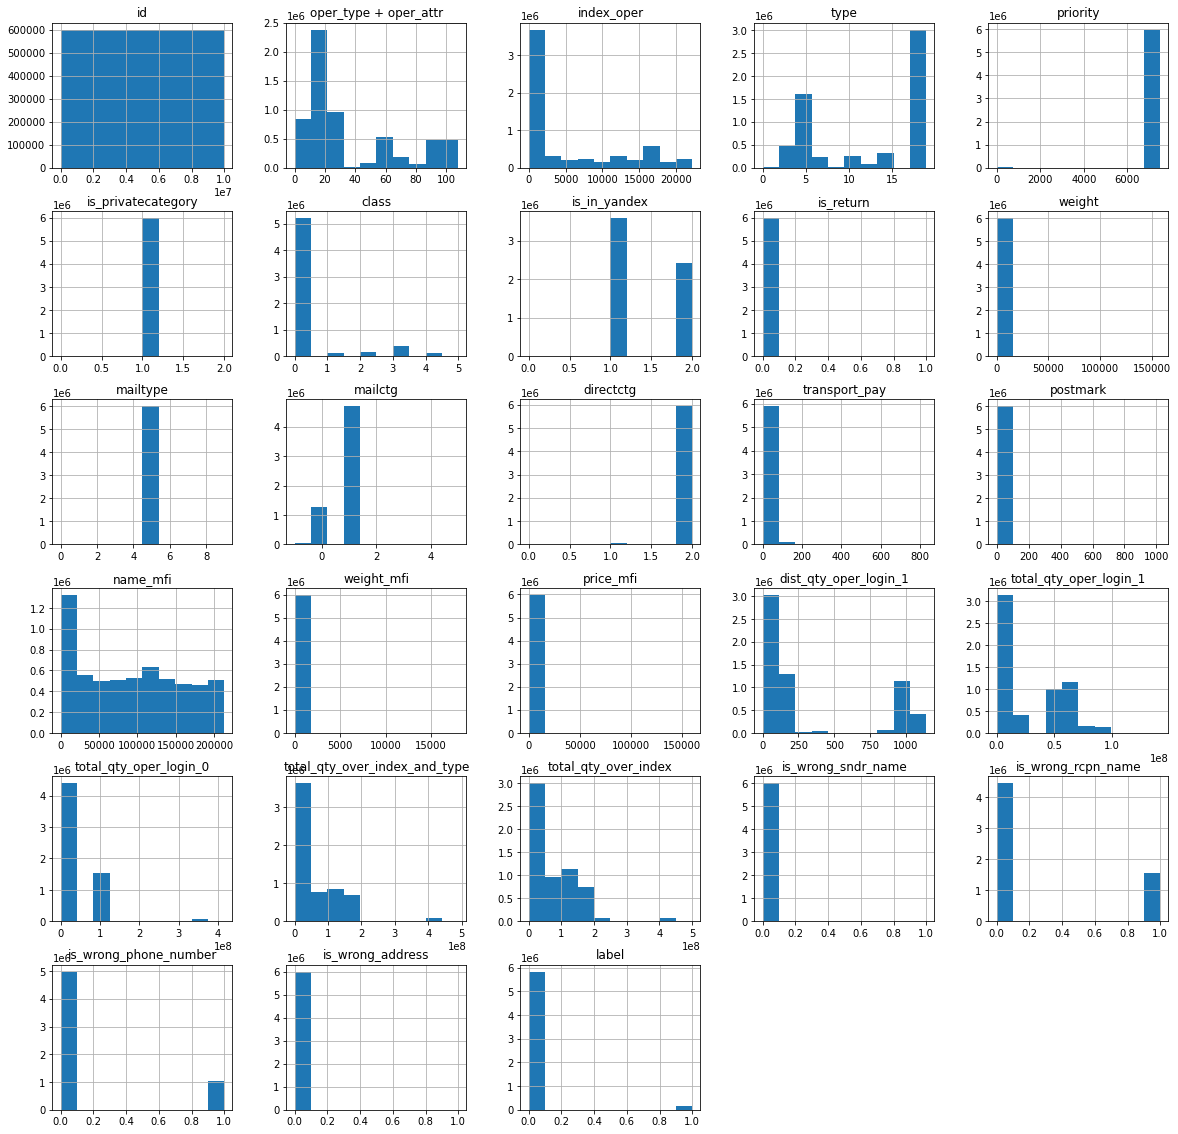

In [40]:
figsize(20,20)
df.hist();

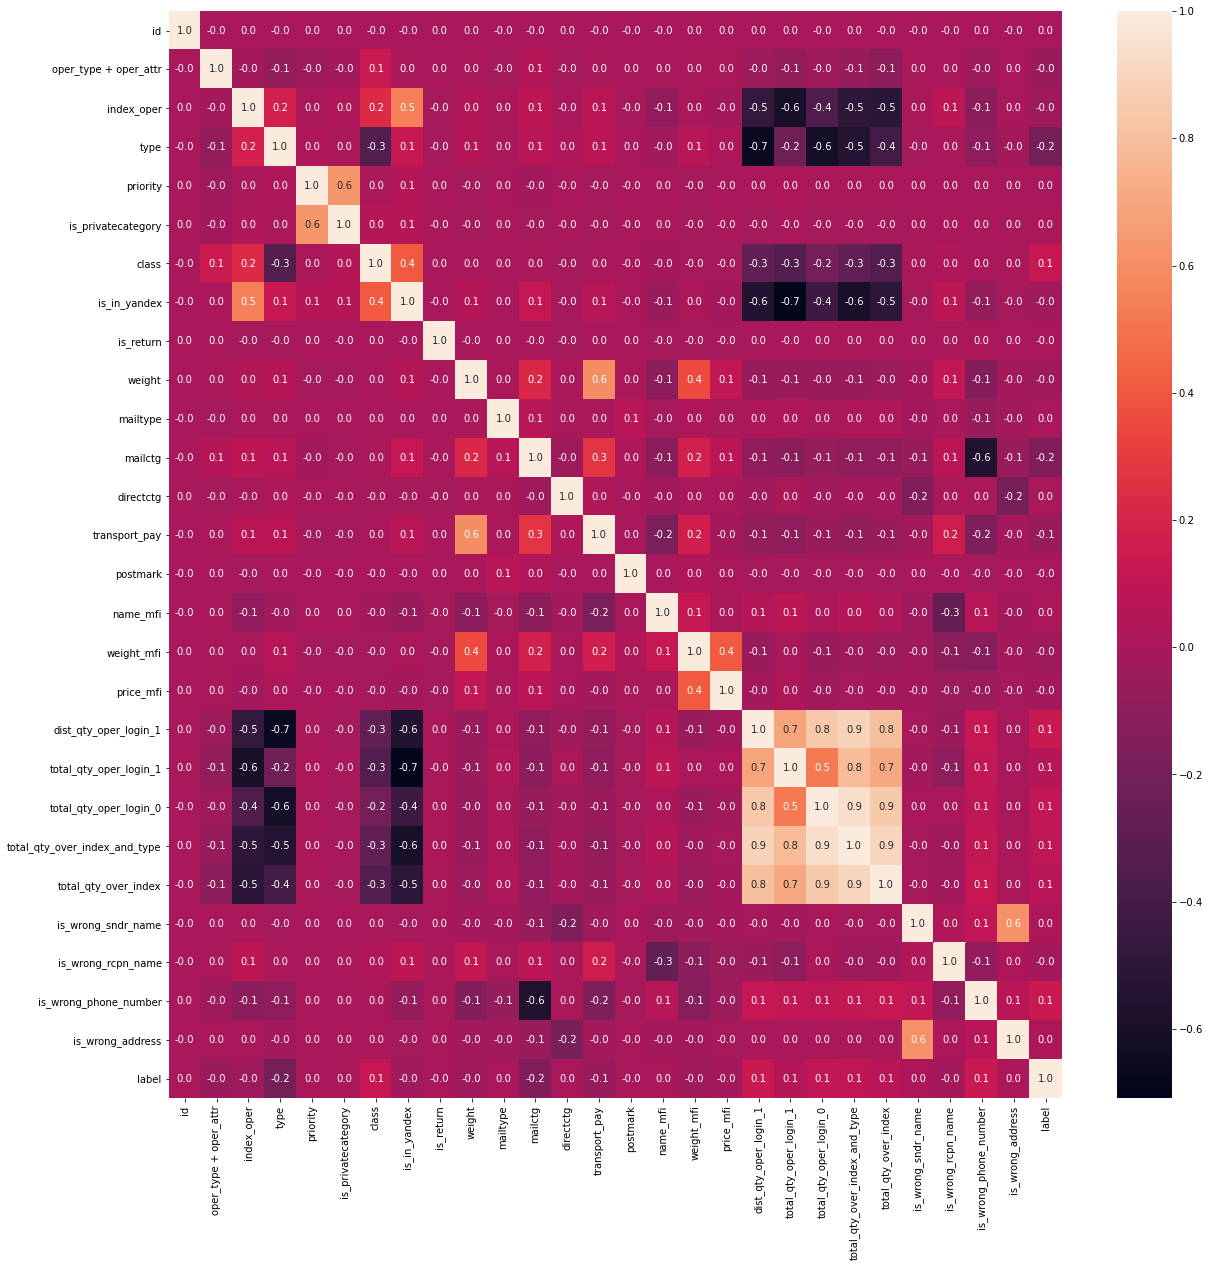

In [41]:
sns.heatmap(df.corr(),annot=True,fmt='.01f');

По графикам делаем вывод что на целевую переменную влияют
- is_wrong_phone_number
- is_wrong_rcpn_name
- total_qty_over_index
- total_qty_over_index_and_type
- total_qty_oper_login_0
- total_qty_oper_login_1
- dist_qty_oper_login_1
- class

In [42]:
df_for_analis = df[['is_wrong_phone_number','dist_qty_oper_login_1','class','label']]

In [43]:
df_for_analis

,is_wrong_phone_number,dist_qty_oper_login_1,class,label
0,0,42.0,0.0,0
1,0,914.0,0.0,0
2,0,62.0,0.0,0
3,0,55.0,0.0,0
4,0,16.0,0.0,0
...,...,...,...,...
5999995,1,1089.0,0.0,0
5999996,0,31.0,0.0,0
5999997,0,186.0,0.0,0
5999998,0,105.0,0.0,0


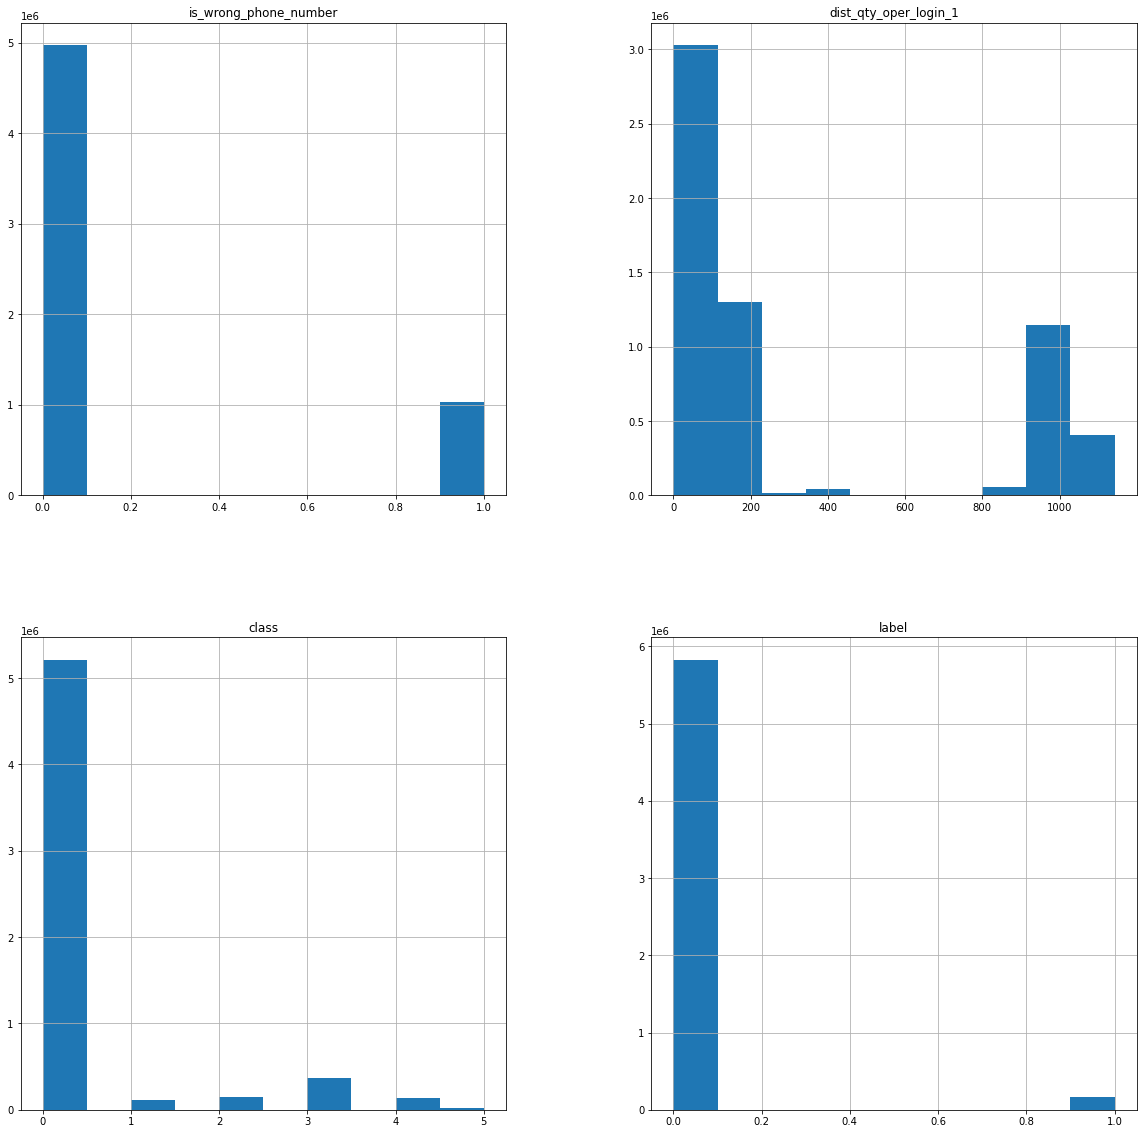

In [44]:
df_for_analis.hist();

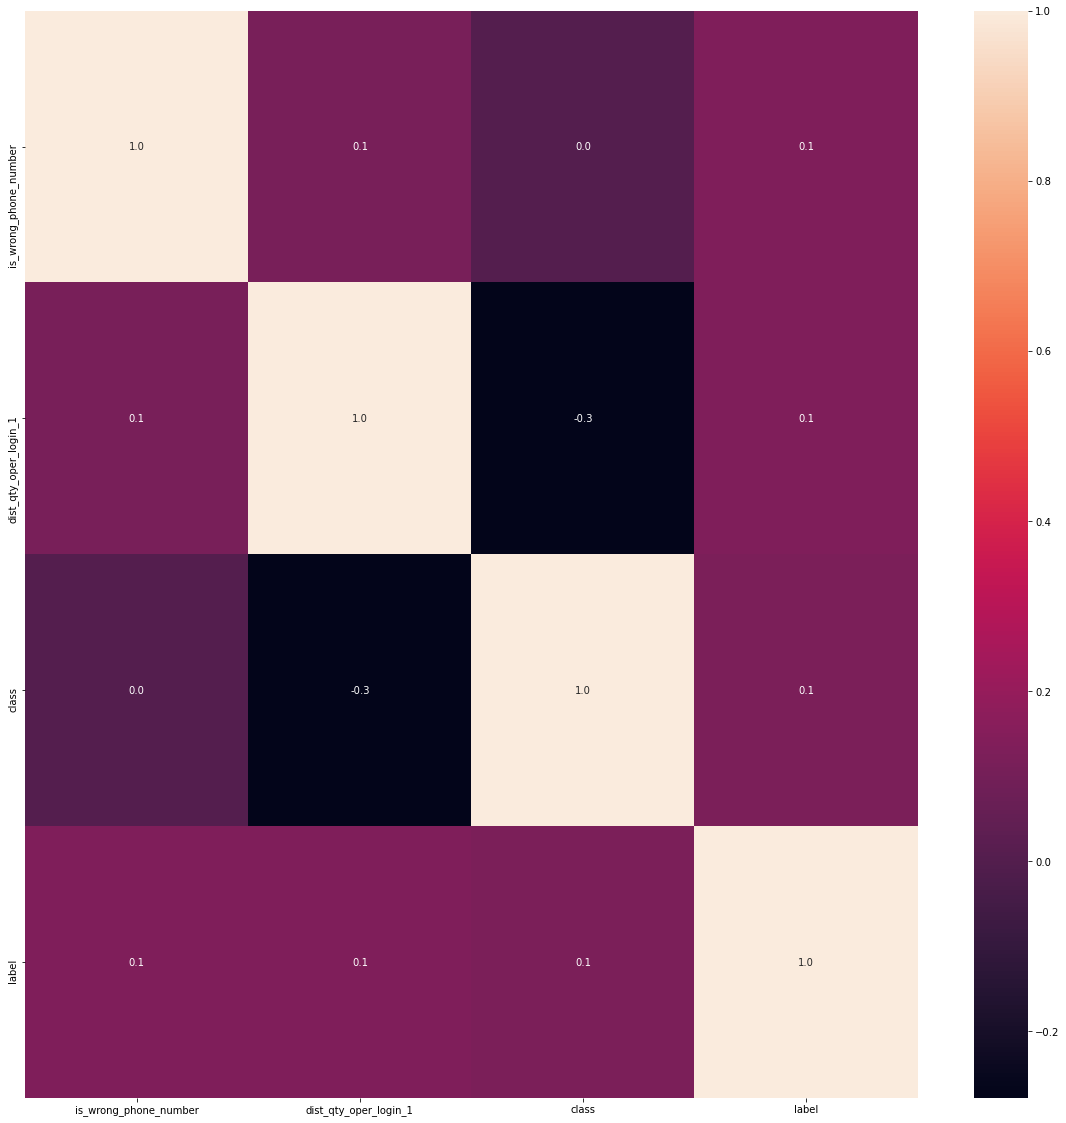

In [45]:
sns.heatmap(df_for_analis.corr(),annot=True,fmt='.01f');

### Построим модель предсказания переменной label

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scal = StandardScaler()

In [48]:
df_scal = scal.fit_transform(df_for_analis.drop('label',axis=1))

In [49]:
df_scal

array([[-0.454126  , -0.69051553, -0.36220629],
       [-0.454126  ,  1.48269666, -0.36220629],
       [-0.454126  , -0.64067122, -0.36220629],
       ...,
       [-0.454126  , -0.33163646, -0.36220629],
       [-0.454126  , -0.53350594, -0.36220629],
       [-0.454126  , -0.79269638,  3.69394227]])

In [50]:
x = df_scal.copy()
y = df.label

In [51]:
y.value_counts()

0    5829020
1     170980
Name: label, dtype: int64

Необходимо сбалансировать y

In [52]:
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [87]:
logReg = LogisticRegression()

In [88]:
logReg.fit(x_train,y_train)

LogisticRegression()

In [89]:
y_pred = logReg.predict(x_test)

In [90]:
from sklearn import metrics

In [91]:
print(confusion_matrix(y_test,y_pred))

[[1747812     894]
 [  51073     221]]


In [92]:
logReg.score(x_test,y_test)

0.9711294444444445

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
dtc = DecisionTreeClassifier(random_state=0)

In [116]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [117]:
y_pred_dtc = dtc.predict(x_test)

In [118]:
dtc.score(x_test,y_test)

0.9715033333333334

In [139]:
from sklearn.naive_bayes import GaussianNB

In [140]:
gnb = GaussianNB()

In [142]:
gnb.fit(x_train,y_train)

GaussianNB()

In [143]:
y_pred_gnb = gnb.predict(x_test)

In [144]:
gnb.score(x_test,y_test)

0.9438955555555556

In [145]:
df_test = pd.read_csv('test_dataset_test.csv',low_memory=False)

In [146]:
df_test

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,directctg,transport_pay,postmark,name_mfi,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address
0,7815282,8_13,102976,ММПО,7503.0,N,0.0,N,N,85.0,5.0,1.0,0.0,2.0,0.00,0.0,"Screen Protectors,protective case",73.0,489.0,972.0,68766046.0,91123247.0,159889293.0,164927295.0,0,0,0,0
1,8443555,8_2,238753,ГОПС,7503.0,N,4.0,Y,N,21.0,5.0,0.0,0.0,2.0,0.00,0.0,String Iron Block,19.0,186.0,2.0,2895.0,1545.0,4440.0,20623.0,0,1,1,0
2,6352559,1020_-1,618254,ГОПС,7503.0,N,4.0,Y,N,388.0,5.0,1.0,0.0,2.0,34.01,0.0,Jackets,348.0,500.0,3.0,2751.0,993.0,3744.0,37817.0,0,0,0,0
3,4921420,1016_-1,102968,ТИ,7503.0,N,0.0,N,N,1203.0,5.0,1.0,0.0,2.0,83.72,0.0,0,0.0,0.0,69.0,9379609.0,2267333.0,11646942.0,11759329.0,0,1,0,0
4,1420440,1018_-1,102971,Цех,7506.0,N,0.0,N,N,956.0,5.0,1.0,0.0,2.0,14.95,0.0,"Unisex Boots,Boots",946.0,1267.0,181.0,76138189.0,8747.0,76146936.0,84110459.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,9030800,1017_1001,655003,ГОПС,7503.0,N,4.0,Y,N,53.0,5.0,1.0,0.0,2.0,0.00,0.0,"solder tool(jsd-40a),Keyboard light",61.0,262.0,3.0,4297.0,1803.0,6100.0,64613.0,0,0,0,0
3999996,6275048,1023_-1,102976,ММПО,7503.0,N,0.0,N,N,286.0,5.0,1.0,0.0,2.0,32.05,0.0,0,0.0,0.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,1,0,0
3999997,4701757,1022_-1,102969,ТИ,7503.0,N,0.0,N,N,733.0,5.0,1.0,0.0,2.0,49.98,0.0,Men Shoes,662.0,300.0,106.0,17348074.0,3469387.0,20817461.0,20821109.0,0,1,0,0
3999998,611153,39_-1,104006,Участок,7503.0,N,0.0,N,N,265.0,5.0,1.0,0.0,2.0,0.00,0.0,Dresses,247.0,500.0,2.0,15.0,13673720.0,13673735.0,14041298.0,0,0,0,0


In [147]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 28 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   id                             int64  
 1   oper_type + oper_attr          object 
 2   index_oper                     object 
 3   type                           object 
 4   priority                       float64
 5   is_privatecategory             object 
 6   class                          float64
 7   is_in_yandex                   object 
 8   is_return                      object 
 9   weight                         float64
 10  mailtype                       float64
 11  mailctg                        float64
 12  mailrank                       float64
 13  directctg                      float64
 14  transport_pay                  float64
 15  postmark                       float64
 16  name_mfi                       object 
 17  weight_mfi                     float64
 18  pr

In [148]:
df_for_test = df_test[['is_wrong_phone_number','dist_qty_oper_login_1','class']]

In [149]:
df_for_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 3 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   is_wrong_phone_number  int64  
 1   dist_qty_oper_login_1  float64
 2   class                  float64
dtypes: float64(2), int64(1)
memory usage: 91.6 MB


In [150]:
print(df_for_test.isna().sum()/len(df)*100)

is_wrong_phone_number    0.0
dist_qty_oper_login_1    0.0
class                    0.0
dtype: float64


In [151]:
df_test_scal = scal.fit_transform(df_for_test)

In [152]:
df_test_scal

array([[-0.45376351,  1.62778299, -0.3623434 ],
       [ 2.20379115, -0.78997147,  3.6964409 ],
       [-0.45376351, -0.78747894,  3.6964409 ],
       ...,
       [-0.45376351, -0.53074832, -0.3623434 ],
       [-0.45376351, -0.78997147, -0.3623434 ],
       [-0.45376351,  1.91940904, -0.3623434 ]])

In [153]:
xTest = df_test_scal.copy()
yTest = df.label

In [154]:
yTest.unique()

array([0, 1], dtype=int64)

In [155]:
yTest.value_counts()

0    5829020
1     170980
Name: label, dtype: int64

In [104]:
y_test_predict = logReg.predict(xTest)

In [130]:
y_test_predict = dtc.predict(xTest)

In [157]:
y_test_predict = gnb.predict(xTest)

In [158]:
y_test_predict

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=4,random_state=42)

tree_clf.fit(x_train,y_train)

y_predict_tree = tree_clf.predict(xTest)

tree_clf.score(x_test,y_test)

In [159]:
result = df_test[['id']]

In [160]:
result

,id
0,7815282
1,8443555
2,6352559
3,4921420
4,1420440
...,...
3999995,9030800
3999996,6275048
3999997,4701757
3999998,611153


In [161]:
test = pd.Series(np.array(y_test_predict))

In [162]:
test

0          0
1          1
2          1
3          0
4          0
          ..
3999995    1
3999996    0
3999997    0
3999998    0
3999999    0
Length: 4000000, dtype: int64

In [163]:
result['label'] = test

<ipython-input-163-b8748badd3ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['label'] = test


In [164]:
result

,id,label
0,7815282,0
1,8443555,1
2,6352559,1
3,4921420,0
4,1420440,0
...,...,...
3999995,9030800,1
3999996,6275048,0
3999997,4701757,0
3999998,611153,0


In [165]:
result.label.value_counts()

0    3855041
1     144959
Name: label, dtype: int64

import pickle
with open('result.csv','wb') as f:
    pickle.dump(result,f)


from IPython.display import HTML
import base64  
import pandas as pd  
def create_download_link( df, title = "Download CSV file", filename = "final.csv"):  
    csv = df.to_csv(index =False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(result)

In [166]:
result.to_csv('finalResGNB.csv',sep=',',index=False, line_terminator='\n')